# Imports

In [1]:
import json
import numpy as np
import os
import pandas as pd
import plotnine as gg
import statsmodels.formula.api as smf
from Functions import *
gg.theme_set(gg.theme_classic)
default_figure_size = (6.4, 4.8)

In [2]:
# data_dir = 'C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1'
make_firstdatextra = False
data_dir = 'C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34'
plot_dir = data_dir + 'figures'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

# Get data

In [3]:
# rule_data = pd.read_csv(os.path.join(data_dir, 'rule_data.csv'), index_col=0)
# rule_data.loc[rule_data.phase == 'high'][:30]

,sid,phase,goal_id,lowRules,highRules,lowTransferRules,highTransferRules,lowRulesBoth,lowRulesLearnOnly,lowRulesTransferOnly,highRulesBoth,highRulesLearnOnly,highRulesTransferOnly
0,13885,high,0,"[0, 1]","[3, 0]",NaN,"[3, 0]","[0, 1]",NaN,NaN,"[3, 0]",NaN,NaN
3,14239,high,0,"[3, 0]","[1, 0]",NaN,"[1, 3]","[3, 0]",NaN,NaN,NaN,"[1, 0]","[1, 3]"
5,15670,high,0,"[3, 0]","[0, 3]",NaN,"[0, 3]","[3, 0]",NaN,NaN,"[0, 3]",NaN,NaN
6,16849,high,0,"[1, 2]","[3, 0]",NaN,"[2, 0]","[1, 2]",NaN,NaN,NaN,"[3, 0]","[2, 0]"
9,23638,high,0,"[0, 1]","[0, 2]",NaN,"[0, 2]","[0, 1]",NaN,NaN,"[0, 2]",NaN,NaN
10,24817,high,0,"[3, 0]","[2, 0]",NaN,"[2, 3]","[3, 0]",NaN,NaN,NaN,"[2, 0]","[2, 3]"
12,24964,high,0,"[2, 3]","[1, 0]",NaN,"[1, 0]","[2, 3]",NaN,NaN,"[1, 0]",NaN,NaN
15,24979,high,0,"[2, 3]","[3, 2]",NaN,"[3, 2]","[2, 3]",NaN,NaN,"[3, 2]",NaN,NaN
17,26230,high,0,"[2, 3]","[2, 0]",NaN,"[2, 0]","[2, 3]",NaN,NaN,"[2, 0]",NaN,NaN
18,26641,high,0,"[1, 2]","[2, 1]",NaN,"[2, 1]","[1, 2]",NaN,NaN,"[2, 1]",NaN,NaN


In [4]:
all_data = pd.read_csv(os.path.join(data_dir, 'all_data.csv'), index_col=0)
all_data['subtrial'] = all_data['subtrial'].astype(int)
all_data

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (65,66) have mixed types.Specify dtype option on import or set low_memory=False.


,rt,stimulus,key_press,trial_type,trial_index,time_elapsed,internal_node_id,phase,block,trial,...,bool_unlocked_star_highRulesBoth,bool_unlocked_star_highRulesLearnOnly,bool_unlocked_star_highRulesTransferOnly,log_rt,bool_middle_item,bool_star,acc,middle_item_not,middle_item_both,chance_performer
0,797.865,0.0,85.0,learning,297.0,2422963.0,0.0-77.0-0.0,high,0.0,0.0,...,0.0,0.0,0.0,6.683192,False,False,0.0,NaN,NaN,False
1,654.720,0.0,73.0,learning,298.0,2423619.0,0.0-77.0-1.0,high,0.0,0.0,...,0.0,0.0,0.0,6.485734,True,False,0.0,NaN,0.0,False
2,1317.900,0.0,79.0,learning,299.0,2424938.0,0.0-77.0-2.0,high,0.0,0.0,...,0.0,0.0,0.0,7.184553,False,False,0.0,NaN,NaN,False
3,276.305,0.0,80.0,learning,300.0,2425216.0,0.0-77.0-3.0,high,0.0,0.0,...,0.0,0.0,0.0,5.625118,False,False,0.0,7.0,7.0,False
4,823.310,0.0,85.0,learning,302.0,2426546.0,0.0-78.0-0.0,high,0.0,1.0,...,0.0,0.0,0.0,6.714547,False,False,0.0,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251104,NaN,NaN,NaN,learning,NaN,NaN,NaN,low,0.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
251105,NaN,NaN,NaN,learning,NaN,NaN,NaN,low,0.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
251106,NaN,NaN,NaN,transfer,NaN,NaN,NaN,low,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
251107,NaN,NaN,NaN,transfer,NaN,NaN,NaN,low,6.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


# Results

## Prepare data

In [5]:
# Get the trial in which an item was first discovered, for each block, each item, each participant
id_cols = ['sid', 'trial_type', 'phase', 'block', 'middle_item_both', 'subtrial']
first_dat = all_data.groupby(id_cols).aggregate('min').reset_index()[id_cols + ['trial']]
first_dat = first_dat.loc[first_dat['middle_item_both'] < 8]  # Only keep 4 non-items
first_dat['middle_item_both'] = first_dat['middle_item_both'].astype(int)
first_dat = first_dat.reset_index(drop=True)
first_dat

,sid,trial_type,phase,block,middle_item_both,subtrial,trial
0,13885,learning,high,0.0,0,1,0.0
1,13885,learning,high,0.0,0,3,13.0
2,13885,learning,high,0.0,1,1,14.0
3,13885,learning,high,0.0,1,3,5.0
4,13885,learning,high,0.0,2,1,23.0
...,...,...,...,...,...,...,...
16627,39520,transfer,low,7.0,1,3,2.0
16628,39520,transfer,low,7.0,2,1,5.0
16629,39520,transfer,low,7.0,2,3,15.0
16630,39520,transfer,low,7.0,4,1,7.0


In [6]:
def make_first_dat_extra(first_dat, trial_shifts=range(-5, 10)):
    
    """
    Select 5 trials before and 10 trials after the first discover of an item and put them in a dataframe.
    """

    first_dat_extra = pd.DataFrame()

    for row_i in range(first_dat.shape[0]):

        if (row_i % 50) == 1:
            print('{} of {} rows ({}%)                       '.format(
                row_i+1, first_dat.shape[0], 100 * np.round((row_i+1) / first_dat.shape[0], 3)), end='\r')

        for trial_shift in trial_shifts:
            row = first_dat.loc[row_i, ['sid', 'trial_type', 'phase', 'block', 'trial', 'subtrial', 'middle_item_both']]
            row['trial'] += trial_shift
            row['trial_reltofirst'] = trial_shift
            first_dat_extra = first_dat_extra.append(row)
            
    first_dat_extra = first_dat_extra.rename(columns={'middle_item_both': 'middle_item_both_sequence', 'subtrial': 'subtrial_sequence'})
    first_dat_extra = first_dat_extra.loc[first_dat_extra['trial'] >= 0]
    first_dat_extra['trial_reltofirst'] = first_dat_extra['trial_reltofirst'].astype(int)
    first_dat_extra = first_dat_extra.reset_index(drop=True)
            
    return first_dat_extra

In [7]:
if make_firstdatextra:
    
    first_dat_extra = make_first_dat_extra(first_dat, trial_shifts=range(-5, 10))
    first_dat_extra.to_csv(os.path.join(data_dir, 'first_dat_extra.csv'), index=False)
else:

    first_dat_extra = pd.read_csv(os.path.join(data_dir, 'first_dat_extra.csv'))

In [8]:
first_dat_extra.loc[first_dat_extra['middle_item_both_sequence'] > 4][:30]

,block,middle_item_both_sequence,phase,sid,subtrial_sequence,trial,trial_reltofirst,trial_type
112,0.0,5.0,high,13885.0,3.0,6.0,-5,learning
113,0.0,5.0,high,13885.0,3.0,7.0,-4,learning
114,0.0,5.0,high,13885.0,3.0,8.0,-3,learning
115,0.0,5.0,high,13885.0,3.0,9.0,-2,learning
116,0.0,5.0,high,13885.0,3.0,10.0,-1,learning
117,0.0,5.0,high,13885.0,3.0,11.0,0,learning
118,0.0,5.0,high,13885.0,3.0,12.0,1,learning
119,0.0,5.0,high,13885.0,3.0,13.0,2,learning
120,0.0,5.0,high,13885.0,3.0,14.0,3,learning
121,0.0,5.0,high,13885.0,3.0,15.0,4,learning


In [9]:
# Get info on actions, rts, etc. on these selected trials and add them to the dataframe
f_dat = pd.merge(first_dat_extra, all_data, how='left')

# `sequence_item_bool` indicates whether the current item is the one that this sequence is about, i.e., 
# the one that occurs for the first time at `trial_reltofirst` == 0 and because of which we collected all
# the trials before and after.
f_dat['sequence_item_bool'] = f_dat['middle_item_both_sequence'] == f_dat['middle_item_both']
f_dat['sequence_item_bool'] = f_dat['sequence_item_bool'].astype(int)

# exists indicates whether a 2-key sequence "exists" (leads to an item on the screen) or not (any made-up sequence
# with no consequence for the game).
f_dat['exists'] = f_dat['middle_item_both'] < 4

# Check it out
f_dat[
    ['sid', 'phase', 'trial_type', 'block', 'trial', 'subtrial', 'action_id', 'middle_item_both_sequence', 'middle_item_both', 'subtrial_sequence', 'trial_reltofirst', ]
][40:70]

,sid,phase,trial_type,block,trial,subtrial,action_id,middle_item_both_sequence,middle_item_both,subtrial_sequence,trial_reltofirst
40,13885.0,high,learning,0.0,8.0,0.0,0.0,0.0,NaN,3.0,-5
41,13885.0,high,learning,0.0,8.0,1.0,1.0,0.0,0.0,3.0,-5
42,13885.0,high,learning,0.0,8.0,2.0,1.0,0.0,NaN,3.0,-5
43,13885.0,high,learning,0.0,8.0,3.0,3.0,0.0,11.0,3.0,-5
44,13885.0,high,learning,0.0,9.0,0.0,0.0,0.0,NaN,3.0,-4
45,13885.0,high,learning,0.0,9.0,1.0,1.0,0.0,0.0,3.0,-4
46,13885.0,high,learning,0.0,9.0,2.0,2.0,0.0,NaN,3.0,-4
47,13885.0,high,learning,0.0,9.0,3.0,3.0,0.0,1.0,3.0,-4
48,13885.0,high,learning,0.0,10.0,0.0,0.0,0.0,NaN,3.0,-3
49,13885.0,high,learning,0.0,10.0,1.0,1.0,0.0,0.0,3.0,-3


## Choices around item discovery

In [10]:
sub_dat = f_dat.loc[
    (f_dat['sid'].isin(list(set(f_dat['sid']))[:5])) &  # Display 10 participants to keep figure reasonable
    (f_dat['block'] == 0) &  # Display only blocks 0 and 1
    (f_dat['middle_item_both_sequence'] < 4)
     ]
sub_dat

,block,middle_item_both_sequence,phase,sid,subtrial_sequence,trial,trial_reltofirst,trial_type,rt,stimulus,...,bool_unlocked_star_highRulesTransferOnly,log_rt,bool_middle_item,bool_star,acc,middle_item_not,middle_item_both,chance_performer,sequence_item_bool,exists
87717,0.0,0.0,high,24964.0,1.0,0.0,-2,learning,1000.000,0.0,...,0.0,6.908755,False,False,0.0,NaN,NaN,True,0,False
87718,0.0,0.0,high,24964.0,1.0,0.0,-2,learning,190.000,0.0,...,0.0,5.252273,False,False,0.0,4.0,4.0,True,0,False
87719,0.0,0.0,high,24964.0,1.0,0.0,-2,learning,209.000,0.0,...,0.0,5.347108,False,False,0.0,NaN,NaN,True,0,False
87720,0.0,0.0,high,24964.0,1.0,0.0,-2,learning,138.000,0.0,...,0.0,4.934474,False,False,0.0,11.0,11.0,True,0,False
87721,0.0,0.0,high,24964.0,1.0,1.0,-1,learning,1160.000,0.0,...,0.0,7.057037,False,False,0.0,NaN,NaN,True,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808685,0.0,3.0,low,39304.0,3.0,12.0,8,transfer,48.920,0.0,...,0.0,3.910422,False,False,0.0,5.0,5.0,False,0,False
808686,0.0,3.0,low,39304.0,3.0,13.0,9,transfer,1115.595,0.0,...,0.0,7.018039,False,False,0.0,NaN,NaN,False,0,False
808687,0.0,3.0,low,39304.0,3.0,13.0,9,transfer,89.625,0.0,...,0.0,4.506730,False,False,0.0,NaN,NaN,False,0,False
808688,0.0,3.0,low,39304.0,3.0,13.0,9,transfer,644.590,0.0,...,0.0,6.470165,False,False,0.0,NaN,NaN,False,0,False


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_point : Removed 266 rows containing missing values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\guides\guides.py:261: PlotnineWarning: geom_point legend : Removed 1 rows containing missing values.


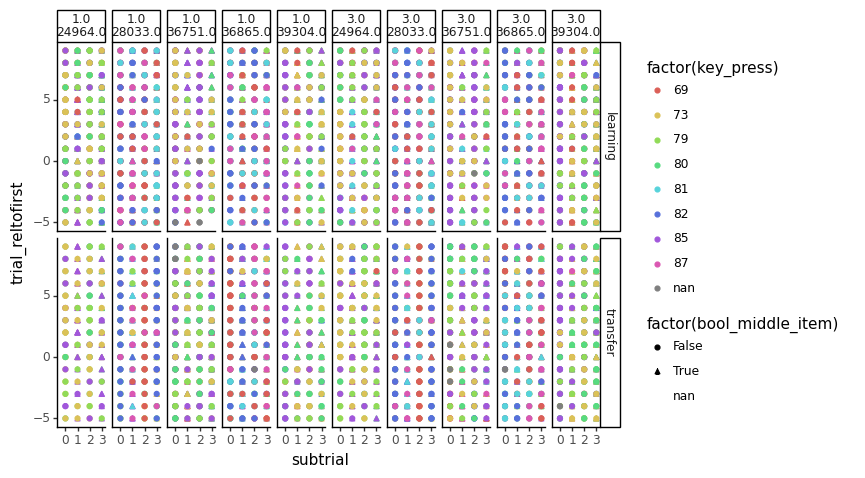

<ggplot: (104346999071)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 7 x 5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\104_RawKeyPressesAroundItemDiscover.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_point : Removed 266 rows containing missing values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\guides\guides.py:261: PlotnineWarning: geom_point legend : Removed 1 rows containing missing values.


In [11]:
gg.options.figure_size = (7, 5)
g = (gg.ggplot(sub_dat, gg.aes('subtrial', 'trial_reltofirst', color='factor(key_press)', shape='factor(bool_middle_item)'))
     + gg.geom_point()
     + gg.coord_cartesian(xlim=(-0.5, 3.1))
     + gg.facet_grid('trial_type ~ subtrial_sequence + sid', scales='free_x')#, labeller='label_both')
    )
print(g)
g.save(os.path.join(plot_dir, '104_RawKeyPressesAroundItemDiscover.png'))
gg.options.figure_size = default_figure_size

## RTs around item discovery

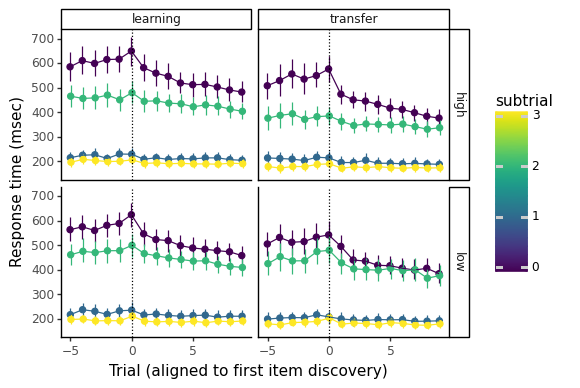

<ggplot: (104345909185)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 5 x 4 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\104_subtrialRtsOverTrialreltofirst.png


In [12]:
subj_dat = f_dat.loc[(f_dat['subtrial_sequence'] == 1)].groupby(
    ['sid', 'phase', 'trial_type', 'trial_reltofirst', 'subtrial']).aggregate('mean').reset_index()

# Strong decrease in subtrial0 and subtrial1 RT! => Because we're learning this item :)
gg.options.figure_size = (5, 4)
g = (gg.ggplot(subj_dat, gg.aes('trial_reltofirst', 'rt', color='subtrial', group='subtrial'))
     + gg.stat_summary(position=gg.position_dodge(width=0.1))
     + gg.stat_summary(geom='line', position=gg.position_dodge(width=0.1))
     + gg.geom_vline(xintercept=0, linetype='dotted')
     + gg.labs(x='Trial (aligned to first item discovery)', y='Response time (msec)')
     + gg.facet_grid('phase ~ trial_type')
    )
print(g)
g.save(os.path.join(plot_dir, '104_subtrialRtsOverTrialreltofirst.png'))

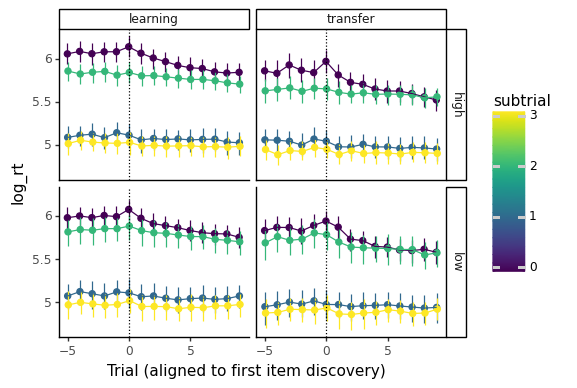

<ggplot: (104345909185)>

In [13]:
g += gg.aes(y='log_rt')
g

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 8 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 8 rows containing non-finite values.


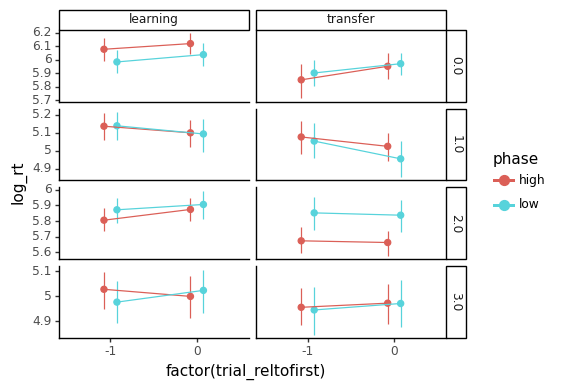

<ggplot: (104349812444)>

In [14]:
sub_dat_st2 = f_dat.loc[
    f_dat['subtrial_sequence'].isin([1]) & (f_dat['trial_reltofirst'].isin([-1, 0])) & (f_dat['middle_item_both_sequence'] < 4)
]

subj_dat = sub_dat_st2.groupby(['sid', 'phase', 'trial_type', 'subtrial', 'subtrial_sequence', 'trial_reltofirst', 'middle_item_both_sequence']).aggregate('mean').reset_index()

g = (gg.ggplot(subj_dat, gg.aes('factor(trial_reltofirst)', 'log_rt', color='phase', group='phase'))
     + gg.stat_summary(position=gg.position_dodge(width=0.3))
     + gg.stat_summary(position=gg.position_dodge(width=0.3), geom='line')
     + gg.facet_grid('subtrial ~ trial_type', scales='free')
    )
g

In [15]:
def get_diff_dat(sub_dat,
                 id_cols = ['sid', 'phase', 'trial_type', 'block', 'middle_item_both_sequence', 'subtrial_sequence', 'subtrial']):
    
    diff_dat = pd.merge(
        sub_dat.loc[sub_dat['trial_reltofirst'] == -1, id_cols + ['rt']],
        sub_dat.loc[sub_dat['trial_reltofirst'] == 0, id_cols + ['trial', 'trial_', 'rt']],
        on=id_cols, suffixes=['_pre', '_at']
    )
    diff_dat['rt_at_minus_pre'] = diff_dat['rt_at'] - diff_dat['rt_pre']
    diff_dat['changed_item'] = diff_dat['middle_item_both_sequence'].isin([2, 3])  # Which items were modified in low transfer?
    diff_dat = diff_dat.dropna()

    return diff_dat

# # Example use
# get_diff_dat(sub_dat)

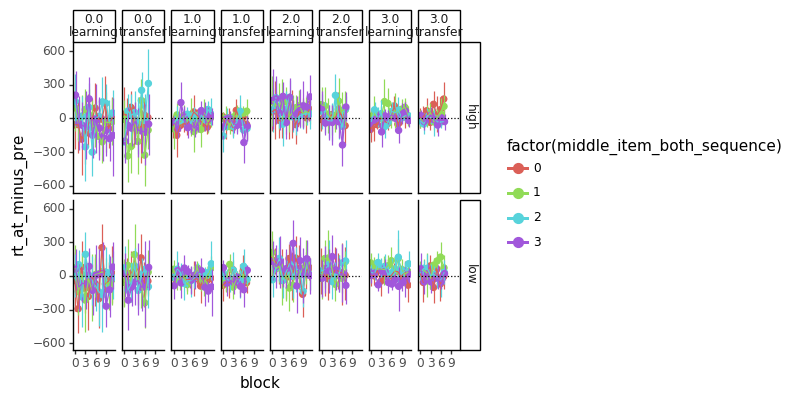

<ggplot: (104368408989)>

In [16]:
gg.options.figure_size = (5, 4)
diff_dat = get_diff_dat(sub_dat_st2)
g = (gg.ggplot(diff_dat, gg.aes('block', 'rt_at_minus_pre', color='factor(middle_item_both_sequence)'))
     + gg.stat_summary(position=gg.position_dodge(width=0.3))
     + gg.stat_summary(position=gg.position_dodge(width=0.3), geom='line')
     + gg.geom_hline(yintercept=0, linetype='dotted')
     + gg.facet_grid('phase ~ subtrial + trial_type')
    )
g

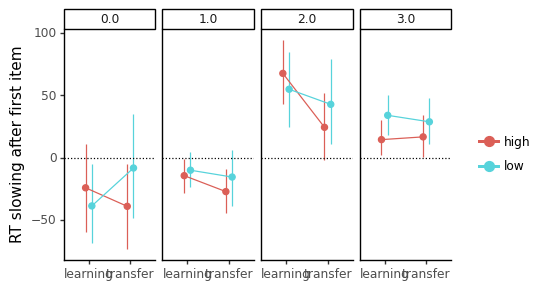

<ggplot: (104350353089)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 5 x 3 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\rt_at_minus_preOverPhase.png


In [17]:
subj_dat = diff_dat.groupby(['sid', 'trial_type', 'phase', 'subtrial']).aggregate('mean').reset_index()

gg.options.figure_size = (5, 3)
g = (gg.ggplot(subj_dat, gg.aes('trial_type', 'rt_at_minus_pre', color='factor(phase)', group='factor(phase)'))
     + gg.stat_summary(position=gg.position_dodge(width=0.3))
     + gg.stat_summary(position=gg.position_dodge(width=0.3), geom='line')
     + gg.geom_hline(yintercept=0, linetype='dotted')
     + gg.labs(x='', color='', y='RT slowing after first item')
     + gg.facet_grid('~ subtrial')
    )
print(g)
g.save(os.path.join(plot_dir, 'rt_at_minus_preOverPhase.png'))

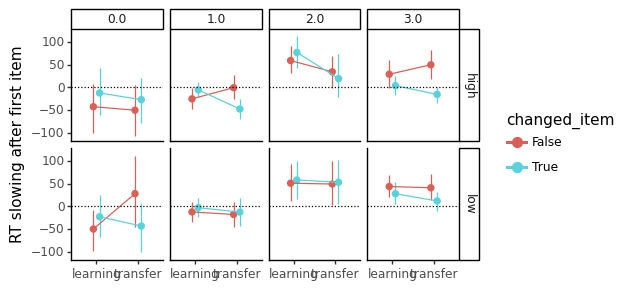

<ggplot: (104367647558)>

In [18]:
subj_dat = diff_dat.groupby(['sid', 'trial_type', 'phase', 'changed_item', 'subtrial']).aggregate('mean').reset_index()

g = g + gg.aes(color='changed_item', group='changed_item') + gg.facet_grid('phase ~ subtrial')
g.data = subj_dat
g

In [19]:
predictors = [
    '1',
    'block + phase * trial_type',
]

mod_dat = diff_dat.loc[diff_dat['subtrial'] == 2]
for pred in predictors:
    mod = smf.mixedlm(formula='rt_at_minus_pre ~ {}'.format(pred), data=mod_dat, groups=mod_dat['sid']).fit()
    print(mod.summary())

            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: rt_at_minus_pre
No. Observations: 3939    Method:             REML           
No. Groups:       49      Scale:              180610.4603    
Min. group size:  44      Log-Likelihood:     -29437.3819    
Max. group size:  106     Converged:          Yes            
Mean group size:  80.4                                       
--------------------------------------------------------------
               Coef.    Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------------
Intercept       49.063     8.825  5.560  0.000  31.766  66.360
Group Var     1542.953     1.838                              

                       Mixed Linear Model Regression Results
Model:                    MixedLM        Dependent Variable:        rt_at_minus_pre
No. Observations:         3939           Method:                    REML           
No. Groups:               49     

## "Practicing" items after first discovery

### More repetition of existing that non-existing sequences -> item appearance motivates repetition

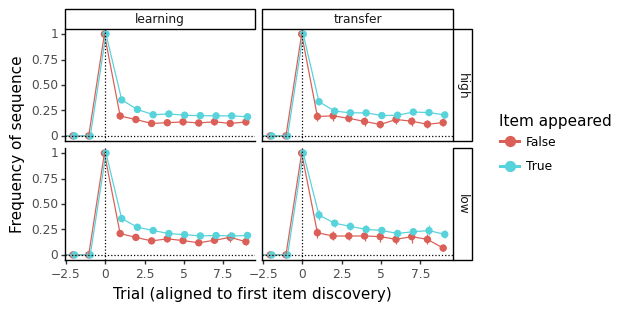

<ggplot: (104368426921)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 5 x 3 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\104_repeatItemsAfterDiscoveryByExist.png


In [20]:
id_cols = ['sid', 'phase', 'trial_type', 'trial_reltofirst', 'exists']
subj_dat = f_dat.loc[
    (f_dat['subtrial'] == f_dat['subtrial_sequence']) &  # indicates whether the current `subtrial` (indicating the subtrial of the action, rt, etc.) is the subtrial of initial item discovery (`middle_item_both_sequence`).
    (f_dat['middle_item_both'] < 8) &  # 4 "existing" (lead to item) and 4 "non-existing" items (random 2-key sequences), for comparable numbers
    (f_dat['acc'] == 0)  # Only trials in which NO star was achieved, to control for that
].groupby(id_cols).aggregate('mean').reset_index()

g = (gg.ggplot(subj_dat, gg.aes('trial_reltofirst', 'sequence_item_bool', color='exists', group='exists'))
#      + gg.geom_point(alpha=0.1, position='jitter')
     + gg.stat_summary(position=gg.position_dodge(width=0.2))
     + gg.stat_summary(position=gg.position_dodge(width=0.2), geom='line')
     + gg.geom_hline(yintercept=0, linetype='dotted')
     + gg.geom_vline(xintercept=0, linetype='dotted')
     + gg.labs(x='Trial (aligned to first item discovery)', y='Frequency of sequence', color='Item appeared')
     + gg.coord_cartesian(xlim=(-2, 9))
     + gg.facet_grid('phase ~ trial_type')
    )
print(g)
g.save(os.path.join(plot_dir, '104_repeatItemsAfterDiscoveryByExist.png'))

In [21]:
id_cols = ['sid', 'phase', 'trial_type', 'trial_reltofirst', 'exists']
diff_dat = pd.merge(
    subj_dat.loc[subj_dat['exists'], id_cols[:-1] + ['sequence_item_bool']],
    subj_dat.loc[np.invert(subj_dat['exists']), id_cols[:-1] + ['sequence_item_bool']],
    on=id_cols[:-1], suffixes=['_exists', '_existsnot']
)
diff_dat['seq_bool_ex_minus_not'] = diff_dat['sequence_item_bool_exists'] - diff_dat['sequence_item_bool_existsnot']
diff_dat = diff_dat.loc[diff_dat['trial_reltofirst'] > 0]  # Trials AFTER item discovery
diff_dat

,sid,phase,trial_type,trial_reltofirst,sequence_item_bool_exists,sequence_item_bool_existsnot,seq_bool_ex_minus_not
6,13885.0,high,learning,1,0.391304,0.133333,0.257971
7,13885.0,high,learning,2,0.224490,0.153846,0.070644
8,13885.0,high,learning,3,0.244444,0.214286,0.030159
9,13885.0,high,learning,4,0.190476,0.111111,0.079365
10,13885.0,high,learning,5,0.325000,0.176471,0.148529
...,...,...,...,...,...,...,...
2878,39520.0,low,transfer,5,0.055556,0.000000,0.055556
2879,39520.0,low,transfer,6,0.277778,0.000000,0.277778
2880,39520.0,low,transfer,7,0.304348,0.000000,0.304348
2881,39520.0,low,transfer,8,0.100000,0.000000,0.100000


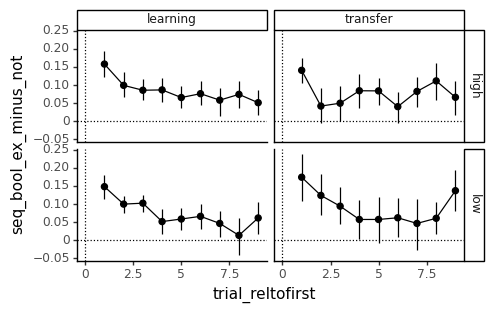

<ggplot: (104367777594)>

In [22]:
m = (gg.ggplot(diff_dat, gg.aes('trial_reltofirst', 'seq_bool_ex_minus_not'))
     + gg.stat_summary()
     + gg.stat_summary(geom='line')
     + gg.geom_hline(yintercept=0, linetype='dotted')
     + gg.geom_vline(xintercept=0, linetype='dotted')
     + gg.facet_grid('phase ~ trial_type')
    )
m

In [23]:
predictors = [
    '1',
    'trial_reltofirst + phase * trial_type',
]

for pred in predictors:
    mod = smf.mixedlm(formula='seq_bool_ex_minus_not ~ {}'.format(pred), data=diff_dat, groups=diff_dat['sid']).fit()
    print(mod.summary())

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.


               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: seq_bool_ex_minus_not
No. Observations: 1731    Method:             REML                 
No. Groups:       49      Scale:              0.0250               
Min. group size:  27      Log-Likelihood:     721.4608             
Max. group size:  36      Converged:          Yes                  
Mean group size:  35.3                                             
----------------------------------------------------------------------
              Coef.    Std.Err.      z       P>|z|    [0.025    0.975]
----------------------------------------------------------------------
Intercept     0.081       0.005    16.461    0.000     0.071     0.091
Group Var     0.000       0.002                                       

                    Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    seq_bool_ex_minus_not
No. Observations:      1731       Method:     

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.


### Split up by individual items

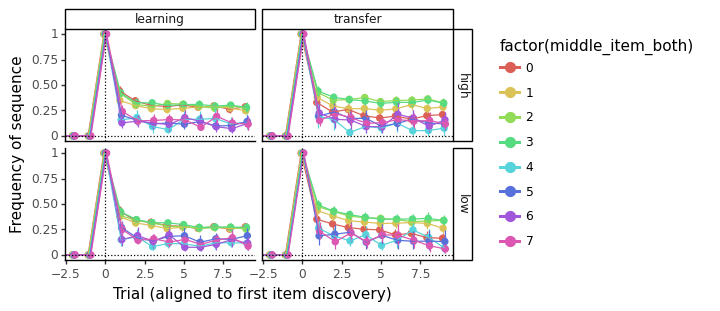

<ggplot: (104368426921)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 5 x 3 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\104_repeatItemsAfterDiscoveryByItem.png


In [24]:
subj_dat = f_dat.loc[
    (f_dat['subtrial'] == f_dat['subtrial_sequence']) & (f_dat['middle_item_both'] < 8)
].groupby(['sid', 'phase', 'trial_type', 'trial_reltofirst', 'middle_item_both']).aggregate('mean').reset_index()

g += gg.aes(color='factor(middle_item_both)', group='factor(middle_item_both)')
g.data = subj_dat
print(g)
g.save(os.path.join(plot_dir, '104_repeatItemsAfterDiscoveryByItem.png'))

### Differences during transfer -> modified items are practiced more (?)

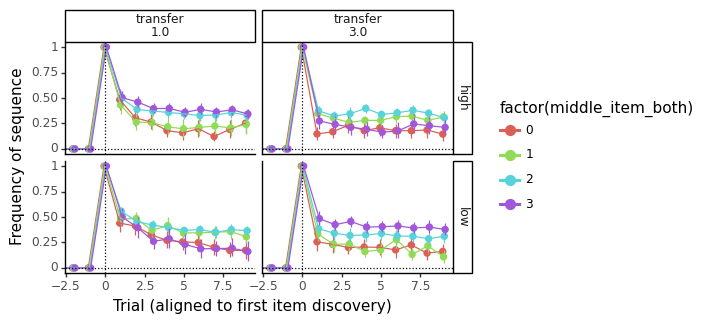

<ggplot: (104368426921)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 5 x 3 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: 104_repeatItemsAfterDiscoveryByItemSubtrial.png


In [25]:
subj_dat = f_dat.loc[
    (f_dat['subtrial'] == f_dat['subtrial_sequence']) & (f_dat['middle_item_both'] < 4) & (f_dat['trial_type'] == 'transfer')
].groupby(['sid', 'phase', 'trial_type', 'trial_reltofirst', 'middle_item_both', 'subtrial_sequence']).aggregate('mean').reset_index()

g += gg.facet_grid('phase ~ trial_type + subtrial_sequence')
g.data = subj_dat
print(g)
g.save(os.path.join('104_repeatItemsAfterDiscoveryByItemSubtrial.png'))

## Trials it takes to transfer a sequence between positions01 and 23

In [26]:
# Look at difference in discovery between subtrial 1 and 3 -> does it transfer?
first_dat['subtrial'] = first_dat['subtrial'].astype(int)
diff_dat = first_dat.pivot_table(
    index=['sid', 'trial_type', 'phase', 'block', 'middle_item_both'],
    columns=['subtrial'],
    values=['trial']
).reset_index()
diff_dat.columns = [''.join([str(e) for e in f]) for f in diff_dat.columns.values]
diff_dat['trial_diff_s1s3'] = np.abs(diff_dat['trial1'] - diff_dat['trial3'])
diff_dat['exists'] = diff_dat['middle_item_both'] < 4
diff_dat = diff_dat.dropna()
diff_dat

,sid,trial_type,phase,block,middle_item_both,trial1,trial3,trial_diff_s1s3,exists
0,13885,learning,high,0.0,0,0.0,13.0,13.0,True
1,13885,learning,high,0.0,1,14.0,5.0,9.0,True
2,13885,learning,high,0.0,2,23.0,2.0,21.0,True
6,13885,learning,high,0.0,6,3.0,1.0,2.0,False
7,13885,learning,high,0.0,7,4.0,0.0,4.0,False
...,...,...,...,...,...,...,...,...,...
10856,39520,transfer,low,6.0,3,21.0,2.0,19.0,True
10859,39520,transfer,low,7.0,0,2.0,0.0,2.0,True
10860,39520,transfer,low,7.0,1,0.0,2.0,2.0,True
10861,39520,transfer,low,7.0,2,5.0,15.0,10.0,True


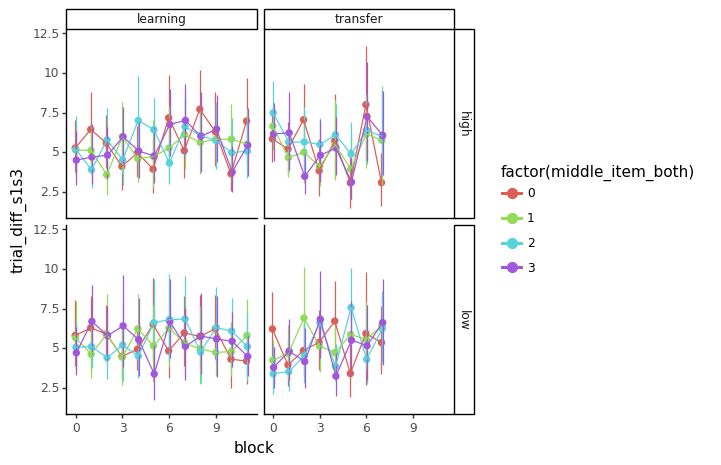

<ggplot: (104346033722)>

In [27]:
subj_dat = diff_dat.loc[diff_dat['exists']].groupby(['sid', 'phase', 'trial_type', 'block', 'middle_item_both']).aggregate('mean').reset_index()

gg.options.figure_size = (5, 5)
g = (gg.ggplot(subj_dat, gg.aes('block', 'trial_diff_s1s3', color='factor(middle_item_both)'))
     + gg.stat_summary(position=gg.position_dodge(width=0.1))
     + gg.stat_summary(position=gg.position_dodge(width=0.1), geom='line')
     + gg.facet_grid('phase ~ trial_type')
    )
g

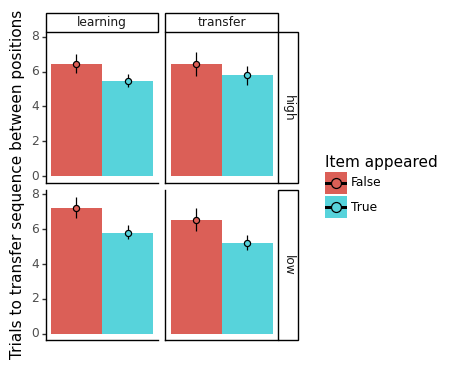

<ggplot: (104367703477)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 3 x 4 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: 104_trialsToTransferByExists.png


In [28]:
subj_dat = diff_dat.groupby(['sid', 'phase', 'trial_type', 'block', 'exists']).aggregate('mean').reset_index()

gg.options.figure_size = (3, 4)
g = (gg.ggplot(subj_dat, gg.aes('1', 'trial_diff_s1s3', fill='exists'))
     + gg.stat_summary(position=gg.position_dodge(width=0.9), geom='bar')
     + gg.stat_summary(position=gg.position_dodge(width=0.9))
     + gg.scale_x_continuous(breaks=[])
     + gg.labs(x='', y='Trials to transfer sequence between positions', fill='Item appeared')
     + gg.facet_grid('phase ~ trial_type')
    )
print(g)
g.save(os.path.join('104_trialsToTransferByExists.png'))

In [29]:
subj_dat.groupby('exists').aggregate('mean').reset_index()[['exists', 'trial_diff_s1s3']]

,exists,trial_diff_s1s3
0,False,6.701920
1,True,5.572409


In [30]:
id_cols = ['sid', 'phase', 'trial_type', 'block']
diffdiff_dat = pd.merge(
    subj_dat.loc[subj_dat['exists'], id_cols + ['trial_diff_s1s3']],
    subj_dat.loc[np.invert(subj_dat['exists']), id_cols + ['trial_diff_s1s3']],
    on=id_cols, suffixes=['_exists', '_existsnot']
)
diffdiff_dat['trial_diff_s1s3_exists_minus_not'] = diffdiff_dat['trial_diff_s1s3_exists'] - diffdiff_dat['trial_diff_s1s3_existsnot']
diffdiff_dat

,sid,phase,trial_type,block,trial_diff_s1s3_exists,trial_diff_s1s3_existsnot,trial_diff_s1s3_exists_minus_not
0,13885,high,learning,0.0,14.333333,3.0,11.333333
1,13885,high,learning,2.0,12.666667,11.5,1.166667
2,13885,high,learning,6.0,3.000000,2.5,0.500000
3,13885,high,learning,7.0,11.000000,6.0,5.000000
4,13885,high,learning,10.0,1.500000,14.0,-12.500000
...,...,...,...,...,...,...,...
1014,39520,low,learning,10.0,2.000000,19.0,-17.000000
1015,39520,low,transfer,0.0,4.250000,2.0,2.250000
1016,39520,low,transfer,1.0,10.000000,3.5,6.500000
1017,39520,low,transfer,5.0,10.000000,9.0,1.000000


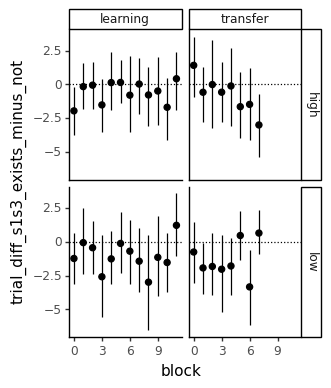

<ggplot: (104350426477)>

In [31]:
g = (gg.ggplot(diffdiff_dat, gg.aes('block', 'trial_diff_s1s3_exists_minus_not'))
     + gg.stat_summary()
     + gg.geom_hline(yintercept=0, linetype='dotted')
     + gg.facet_grid('phase ~ trial_type')
    )
g

In [32]:
mod = smf.mixedlm(
    formula='trial_diff_s1s3_exists_minus_not ~ block',
    data=diffdiff_dat, groups=diffdiff_dat['sid']
).fit()
mod.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Mixed Linear Model Regression Results
==============================================================================
Model:            MixedLM Dependent Variable: trial_diff_s1s3_exists_minus_not
No. Observations: 1019    Method:             REML                            
No. Groups:       49      Scale:              35.1921                         
Min. group size:  8       Log-Likelihood:     -3270.8725                      
Max. group size:  37      Converged:          Yes                             
Mean group size:  20.8                                                        
-----------------------------------------------------------------------------------
                Coef.       Std.Err.        z         P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -0.870         0.330      -2.634      0.008      -1.518      -0.223
block           -0.004         0.057      -0.070      0.944      -0.116       0.108
Group Var        0.784         0.088                                               
==============================================================================

"""

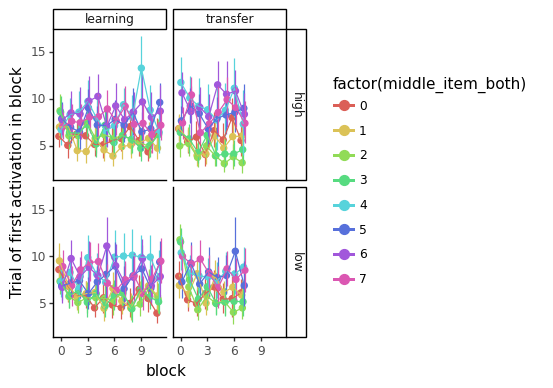

<ggplot: (104367475764)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 3 x 4 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: 104_trialOfSequenceDiscoveryOverBlock.png


In [33]:
# Gradual decrease in the number of trials needed to activate middle_items
# In low transfer, 2 & 3 take much longer than 0 & 1 -> because they are new!
# In high transfer, previous knowledge is retained :)
g = (gg.ggplot(first_dat, gg.aes('block', 'trial', color='factor(middle_item_both)'))
     + gg.stat_summary(position=gg.position_dodge(width=0.5))
     + gg.stat_summary(position=gg.position_dodge(width=0.5), geom='line')
     + gg.labs(y='Trial of first activation in block')
     + gg.facet_grid('phase ~ trial_type')
    )
print(g)
g.save(os.path.join('104_trialOfSequenceDiscoveryOverBlock.png'))

## Change in RT patterns with practice

In [34]:
cols = ['sid', 'phase', 'trial_type', 'block', 'middle_item_both', 'subtrial', 'trial', 'rt']

# sub_dat1 = all_data.loc[(all_data['subtrial'] == 1), cols]
# sub_dat3 = all_data.loc[(all_data['subtrial'] == 3), cols]

sub_dat1 = all_data.loc[(all_data['middle_item_both'] < 8) & (all_data['subtrial'] == 1), cols]
sub_dat3 = all_data.loc[(all_data['middle_item_both'] < 8) & (all_data['subtrial'] == 3), cols]

sub_dat1['middle_item_both'] = sub_dat1['middle_item_both'].astype(int)
sub_dat3['middle_item_both'] = sub_dat3['middle_item_both'].astype(int)

sub_dat3[:30]

,sid,phase,trial_type,block,middle_item_both,subtrial,trial,rt
3,13885,high,learning,0.0,7,3,0.0,276.305
7,13885,high,learning,0.0,6,3,1.0,298.555
11,13885,high,learning,0.0,2,3,2.0,284.535
23,13885,high,learning,0.0,1,3,5.0,278.135
27,13885,high,learning,0.0,6,3,6.0,177.645
31,13885,high,learning,0.0,2,3,7.0,222.950
39,13885,high,learning,0.0,1,3,9.0,208.725
43,13885,high,learning,0.0,2,3,10.0,234.805
47,13885,high,learning,0.0,5,3,11.0,207.480
51,13885,high,learning,0.0,6,3,12.0,216.970


In [36]:
id_cols = ['sid', 'phase', 'trial_type', 'block', 'trial']

d1 = sub_dat1.pivot_table(index=id_cols, columns='middle_item_both', values='rt').reset_index()
d1.columns = ['rt{}'.format(c) if type(c) == int else c for c in d1.columns]

d3 = sub_dat3.pivot_table(index=id_cols, columns='middle_item_both', values='rt').reset_index()
d3.columns = ['rt{}'.format(c) if type(c) == int else c for c in d3.columns]

d3

,sid,phase,trial_type,block,trial,rt0,rt1,rt2,rt3,rt4,rt5,rt6,rt7
0,13885,high,learning,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276.305
1,13885,high,learning,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,298.555,NaN
2,13885,high,learning,0.0,2.0,NaN,NaN,284.535,NaN,NaN,NaN,NaN,NaN
3,13885,high,learning,0.0,5.0,NaN,278.135,NaN,NaN,NaN,NaN,NaN,NaN
4,13885,high,learning,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,177.645,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39271,39520,low,transfer,7.0,20.0,NaN,NaN,169.035,NaN,NaN,NaN,NaN,NaN
39272,39520,low,transfer,7.0,21.0,NaN,NaN,136.205,NaN,NaN,NaN,NaN,NaN
39273,39520,low,transfer,7.0,22.0,NaN,NaN,172.820,NaN,NaN,NaN,NaN,NaN
39274,39520,low,transfer,7.0,23.0,NaN,NaN,193.665,NaN,NaN,NaN,NaN,NaN


In [37]:
def get_rt_dat(d, subtrial, middle_items=range(8)):
    
    rt_dat = pd.DataFrame()

    for middle_item in middle_items:

        item_dat = d[['sid', 'phase', 'trial_type', 'block', 'trial', 'rt{}'.format(middle_item)]].dropna()

        # Count trials
        id_cols = ['sid', 'phase', 'trial_type', 'block']
        item_dat['ones'] = 1
        item_dat['times_got_item'] = item_dat[id_cols + ['ones']].groupby(id_cols).cumsum()
        item_dat = item_dat.drop(columns=['ones'])

        # Beautify
        item_dat = item_dat.rename(columns={'rt{}'.format(middle_item): 'rt'})
        item_dat['middle_item_both'] = middle_item
        item_dat['subtrial'] = subtrial

        rt_dat = rt_dat.append(item_dat)

    rt_dat['exists'] = rt_dat['middle_item_both'] < 4
    
    return rt_dat

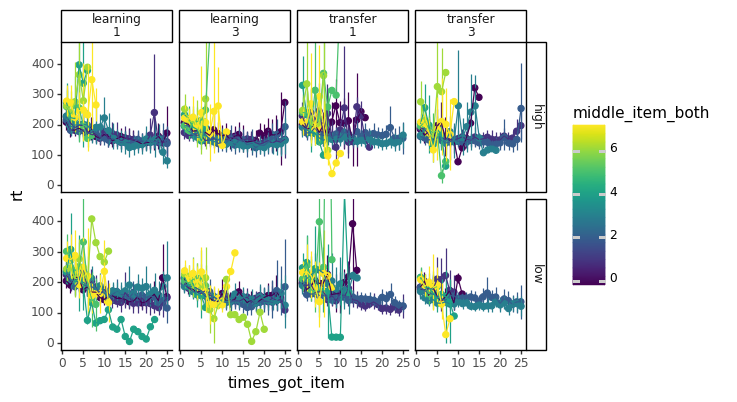

<ggplot: (104367697803)>


In [38]:
rt_dat = get_rt_dat(d1, 1).append(get_rt_dat(d3, 3))
subj_dat = rt_dat.groupby(['sid', 'phase', 'trial_type', 'times_got_item', 'middle_item_both', 'subtrial']).aggregate('mean').reset_index()

gg.options.figure_size = (6, 4)
g = (gg.ggplot(subj_dat, gg.aes('times_got_item', 'rt', color='middle_item_both', group='middle_item_both'))
     + gg.stat_summary(position=gg.position_dodge(width=0.1))
     + gg.stat_summary(position=gg.position_dodge(width=0.1), geom='line')
     + gg.facet_grid('phase ~ trial_type + subtrial', labeller='labeller_both')
     + gg.coord_cartesian(ylim=(0, 450))
    )
print(g)

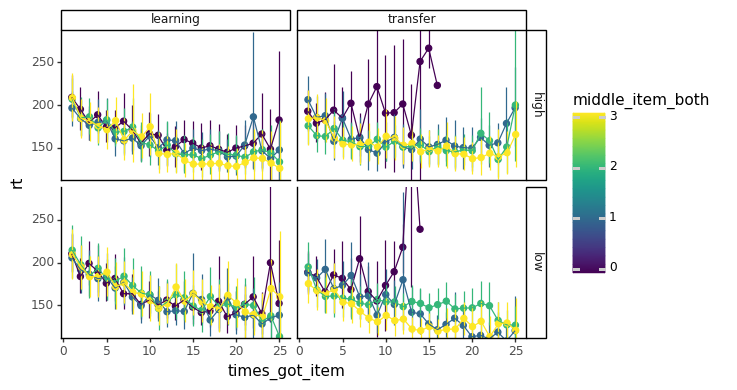

<ggplot: (104367814828)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6 x 4 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: 104_rt2OverTimesSameSequenceExecuted.png


In [39]:
subj_dat = rt_dat.loc[rt_dat['exists']
                     ].groupby(['sid', 'phase', 'trial_type', 'times_got_item', 'middle_item_both']).aggregate('mean').reset_index()

g = g + gg.facet_grid('phase ~ trial_type') + gg.coord_cartesian(ylim=(120, 280))
g.data = subj_dat
print(g)
g.save(os.path.join('104_rt2OverTimesSameSequenceExecuted.png'))

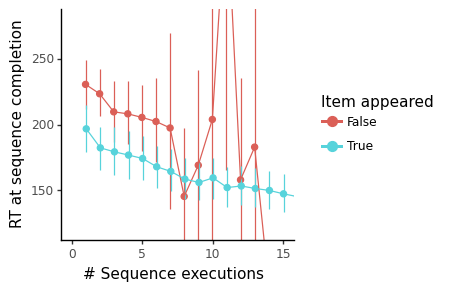

<ggplot: (104367875341)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 3 x 3 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: 104_rt2OverTimesSameSequenceExecutedByExists.png


In [40]:
subj_dat = rt_dat.groupby(['sid', 'times_got_item', 'exists']).aggregate('mean').reset_index()

gg.options.figure_size = (3, 3)
g = (gg.ggplot(subj_dat, gg.aes('times_got_item', 'rt', color='exists', group='exists'))
     + gg.stat_summary(position=gg.position_dodge(width=0.1))
     + gg.stat_summary(position=gg.position_dodge(width=0.1), geom='line')
     + gg.labs(x='# Sequence executions', y='RT at sequence completion', color='Item appeared')
     + gg.coord_cartesian(xlim=(0, 15), ylim=(120, 280))
    )
print(g)
g.save(os.path.join('104_rt2OverTimesSameSequenceExecutedByExists.png'))

In [41]:
# subj_dat = rt_dat.loc[rt_dat['exists']].groupby(['sid', 'trial_type', 'times_got_item', 'subtrial', 'block']).aggregate('mean').reset_index()
subj_dat = rt_dat.groupby(['sid', 'trial_type', 'times_got_item', 'exists', 'block']).aggregate('mean').reset_index()

mod = smf.mixedlm('rt ~ times_got_item * exists + block * exists + trial_type * exists', subj_dat, groups=subj_dat['sid']).fit()
mod.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Mixed Linear Model Regression Results
=====================================================================================
Model:                     MixedLM          Dependent Variable:          rt          
No. Observations:          20906            Method:                      REML        
No. Groups:                49               Scale:                       6324.5700   
Min. group size:           304              Log-Likelihood:              -121270.6839
Max. group size:           491              Converged:                   Yes         
Mean group size:           426.7                                                     
-------------------------------------------------------------------------------------
                                       Coef.   Std.Err.    z    P>|z|  [0.025  0.975]
-------------------------------------------------------------------------------------
Intercept                              251.357    8.520  29.502 0.000 234.658 268.056
exists[T.True]                         -57.540    3.920 -14.680 0.000 -65.223 -49.857
trial_type[T.transfer]                 -14.744    2.972  -4.962 0.000 -20.568  -8.920
trial_type[T.transfer]:exists[T.True]    6.542    3.245   2.016 0.044   0.182  12.902
times_got_item                          -7.194    0.712 -10.107 0.000  -8.589  -5.799
times_got_item:exists[T.True]            5.177    0.719   7.200 0.000   3.768   6.586
block                                   -2.756    0.449  -6.135 0.000  -3.636  -1.875
block:exists[T.True]                     0.957    0.494   1.939 0.052  -0.010   1.925
Group Var                             2938.725    7.588                              
=====================================================================================

"""

## Increase in using valid sequences

In [43]:
all_data['invalid'] = all_data['middle_item_both'].apply(lambda x : 1 if (x > 3) & (x < 8) else 0)
all_data['valid'] = all_data['middle_item_both'].apply(lambda x : 1 if x < 4 else 0)

id_cols = ['sid', 'phase', 'trial_type', 'trial', 'subtrial', 'block', 'acc']
dat_w = all_data[id_cols + ['valid', 'invalid']
                ].melt(id_vars=id_cols, var_name='sequence', value_name='item_achieved')
dat_w

,sid,phase,trial_type,trial,subtrial,block,acc,sequence,item_achieved
0,13885,high,learning,0.0,0,0.0,0.0,valid,0
1,13885,high,learning,0.0,1,0.0,0.0,valid,1
2,13885,high,learning,0.0,2,0.0,0.0,valid,0
3,13885,high,learning,0.0,3,0.0,0.0,valid,0
4,13885,high,learning,1.0,0,0.0,0.0,valid,0
...,...,...,...,...,...,...,...,...,...
391083,39520,low,learning,5.0,3,0.0,NaN,invalid,0
391084,39520,low,learning,6.0,3,0.0,NaN,invalid,0
391085,39520,low,transfer,2.0,3,5.0,NaN,invalid,0
391086,39520,low,transfer,0.0,3,6.0,NaN,invalid,0


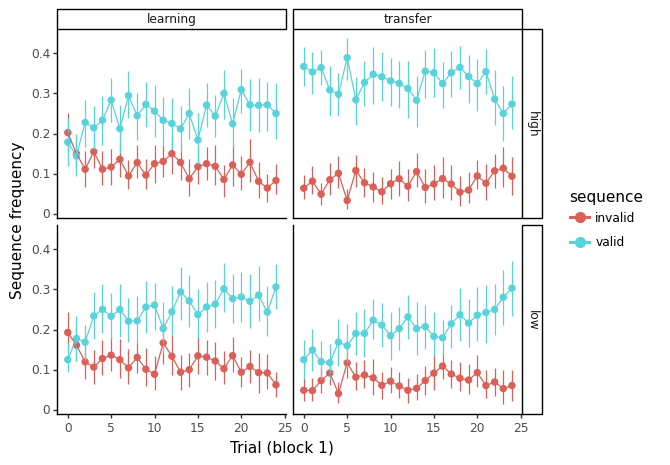

<ggplot: (104371238949)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6 x 5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: 104_sequenceFrequencyOverTrialBlock0.png


In [44]:
subj_dat = dat_w.loc[
    (dat_w['block'] == 0) & (dat_w['acc'] == 0)
].groupby(['sid', 'phase', 'trial_type', 'trial', 'sequence']).aggregate('mean').reset_index()

gg.options.figure_size = (6, 5)
g = (gg.ggplot(subj_dat, gg.aes('trial', 'item_achieved', color='sequence'))
     + gg.stat_summary()
     + gg.stat_summary(geom='line')
     + gg.labs(x='Trial (block 1)', y='Sequence frequency')
     + gg.facet_grid('phase ~ trial_type')
)
print(g)
g.save(os.path.join('104_sequenceFrequencyOverTrialBlock0.png'))

In [45]:
mod_dat = subj_dat.loc[subj_dat['trial_type'] == 'learning']
mod = smf.mixedlm('item_achieved ~ trial * sequence * phase', mod_dat, groups=mod_dat['sid']).fit()
mod.summary()

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.


<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Mixed Linear Model Regression Results
===============================================================================
Model:                    MixedLM       Dependent Variable:       item_achieved
No. Observations:         4090          Method:                   REML         
No. Groups:               49            Scale:                    0.0303       
Min. group size:          46            Log-Likelihood:           1306.6689    
Max. group size:          100           Converged:                Yes          
Mean group size:          83.5                                                 
-------------------------------------------------------------------------------
                                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------------
Intercept                             0.146    0.010 14.071 0.000  0.126  0.167
sequence[T.valid]                     0.065    0.015  4.495 0.000  0.037  0.094
phase[T.low]                         -0.001    0.014 -0.061 0.952 -0.029  0.027
sequence[T.valid]:phase[T.low]       -0.019    0.020 -0.944 0.345 -0.059  0.021
trial                                -0.002    0.001 -3.142 0.002 -0.004 -0.001
trial:sequence[T.valid]               0.005    0.001  4.694 0.000  0.003  0.007
trial:phase[T.low]                    0.000    0.001  0.150 0.881 -0.002  0.002
trial:sequence[T.valid]:phase[T.low]  0.002    0.002  1.090 0.276 -0.001  0.005
Group Var                             0.000    0.001                           
===============================================================================

"""

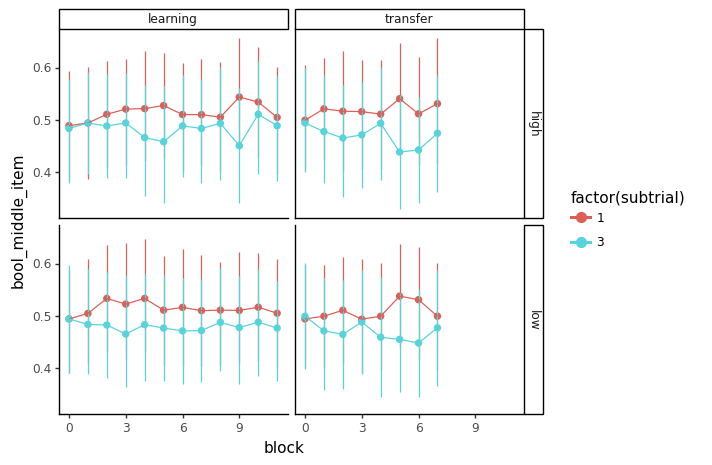

<ggplot: (104368428237)>

In [49]:
# More successful items in the first position than in the second. Because they're practicing?
all_data['bool_middle_item'] = all_data['bool_middle_item'].apply(lambda x : 0 if np.isnan(x) or x == False else 1)
subj_dat = all_data.loc[
    (all_data['acc'] == 0) & (all_data['subtrial'].isin([1, 3]))
].groupby(['sid', 'phase', 'trial_type', 'block', 'subtrial', 'bool_middle_item']).aggregate('mean').reset_index()

g = (gg.ggplot(subj_dat, gg.aes('block', 'bool_middle_item', color='factor(subtrial)'))
     + gg.stat_summary()
     + gg.stat_summary(geom='line')
     + gg.facet_grid('phase ~ trial_type')
    )
g

## Relationship between sequence transfer (`trial_diff_s1s3`) and overall performance?

### perf_dat

In [42]:
subj_dat = first_dat_w.groupby(['sid', 'phase', 'trial_type']).aggregate('mean').reset_index().drop(columns=['block', 'middle_item_both'])
subj_dat

NameError: name 'first_dat_w' is not defined

In [ ]:
id_cols = ['sid', 'phase', 'trial_type']
perf_dat = all_data.groupby(id_cols).aggregate('mean').reset_index()[id_cols + ['rt', 'log_rt', 'acc']]
perf_dat = pd.merge(subj_dat, perf_dat)
perf_dat

In [ ]:
gg.options.figure_size = (8, 4)
g = (gg.ggplot(perf_dat, gg.aes('trial_diff_s1s3', 'acc', color='phase'))
     + gg.geom_point()
     + gg.geom_smooth(method='lm')
     + gg.facet_grid('~ trial_type')
    )
print(g)
g.save(os.path.join('104_accOverTrialDiffSequenceDiscorvery.png'))

In [ ]:
g += gg.aes(y='rt')
g

## Difference in learning curve between first presentation of each star

(First presentation of second star minus first presentation of first star -> is there a difference?)

In [ ]:
def get_diff_dat(all_data, blocks):
    
    t_dat = all_data.loc[(all_data['trial_type'] == 'transfer') & (all_data['block'].isin(blocks))]
    id_cols = ['sid', 'trial_type', 'phase', 'trial', 'subtrial']
    
    diff_dat = pd.merge(
        t_dat.loc[t_dat['block'] == blocks[0], id_cols + ['acc', 'rt', 'goal_star']],
        t_dat.loc[t_dat['block'] == blocks[1], id_cols + ['acc', 'rt', 'goal_star']],
        on=id_cols, suffixes=['_block{}'.format(blocks[0]), '_block{}'.format(blocks[1])]
    )
    diff_dat['acc_block{}_minus_{}'.format(blocks[1], blocks[0])] = \
        diff_dat['acc_block{}'.format(blocks[1])] - diff_dat['acc_block{}'.format(blocks[0])]
    
    return diff_dat

# # Example use
# get_diff_dat(all_data, [0, 1])

In [ ]:
blocks = [0, 1]
d = get_diff_dat(all_data, blocks)
id_cols = ['sid', 'trial_type', 'trial', 'subtrial']
dd_dat = pd.merge(d.loc[d['phase'] == 'high', id_cols + ['acc_block{}_minus_{}'.format(blocks[1], blocks[0])]],
         d.loc[d['phase'] == 'low', id_cols + ['acc_block{}_minus_{}'.format(blocks[1], blocks[0])]],
         on=id_cols, suffixes=['_high', '_low']
        )
dd_dat['{}minus{}_highminuslow'.format(blocks[1], blocks[0])] = dd_dat['acc_block1_minus_0_high'] - dd_dat['acc_block1_minus_0_low']
dd_dat

In [ ]:
g = (gg.ggplot(dd_dat, gg.aes('trial', '1minus0_highminuslow'))
     + gg.stat_summary()
     + gg.geom_hline(yintercept=0, linetype='dotted')
    )
g

In [ ]:
# Make sure we're comparing the same / different stars
d = get_diff_dat(all_data, [0, 2])
a = d.loc[np.invert(np.isnan(d['goal_star_block0'])), ['goal_star_block0', 'goal_star_block2']]
assert np.mean(a['goal_star_block0'] == a['goal_star_block2']) == 1

In [ ]:
for blocks in ([0, 1], [1, 2], [2, 3], [0, 2], [1, 3]):
    
    subj_dat = get_diff_dat(all_data, blocks).groupby(['sid', 'phase', 'trial']).aggregate('mean').reset_index()
    gg.options.figure_size = (3, 3)
    g = (gg.ggplot(subj_dat, gg.aes('trial', 'acc_block{}_minus_{}'.format(blocks[1], blocks[0]), color='phase'))
         + gg.stat_summary()
         + gg.stat_summary(geom='line')
         + gg.geom_hline(yintercept=0, linetype='dotted')
         + gg.labs(y='Acc. diff. 1st pres. each star (blocks {})'.format(blocks), color='')
        )
    print(g)

# OLD AND BROKEN

## Frequency of middle-layer item after first discovery

In [ ]:
first_dat

In [ ]:
first_dat1 = first_dat.loc[first_dat['subtrial'] == 1].reset_index()
first_dat3 = first_dat.loc[first_dat['subtrial'] == 3].reset_index()
first_dat1

In [ ]:
def make_first_dat_extra(first_dat, trial_shifts=range(-5, 10), subtrial=[]):

    first_dat_extra = pd.DataFrame()

    # Find trials around item discovery and concat into a dataframe
    for row_i in range(first_dat.shape[0]):

        if (row_i % 50) == 1:
            print('{} of {} rows ({}%)                       '.format(
                row_i+1, first_dat.shape[0], 100 * np.round((row_i+1) / first_dat.shape[0], 3)), end='\r')

        for trial_shift in trial_shifts:
            row = first_dat.loc[row_i, ['sid', 'trial_type', 'phase', 'block', 'trial', 'subtrial', 'middle_item']]
            row['trial'] += trial_shift
            if subtrial:
                row['subtrial'] = subtrial
            row['trial_reltofirst'] = trial_shift
            first_dat_extra = first_dat_extra.append(row)
            
    # Beatify dataframe
    first_dat_extra = first_dat_extra.rename(columns={'middle_item': 'middle_item_sequence', 'subtrial': 'subtrial_sequence'})
    first_dat_extra = first_dat_extra.loc[first_dat_extra['trial'] >= 0]
    first_dat_extra['trial_reltofirst'] = first_dat_extra['trial_reltofirst'].astype(int)
    first_dat_extra = first_dat_extra.reset_index(drop=True)
            
    return first_dat_extra

# # Example use
# make_first_dat_extra(first_dat3[:100], subtrial=1)

In [ ]:
first_datnot_extra = make_first_dat_extra(first_dat_not[:100].rename(columns={'middle_item1_not': 'middle_item'}))
first_datnot_extra

In [ ]:
first_dat1_extra = make_first_dat_extra(first_dat1[:100], subtrial=1)
first_dat3_extra = make_first_dat_extra(first_dat3[:100], subtrial=1)

In [ ]:
first_dat1_extra['discovery_trial'] = 1
first_dat3_extra['discovery_trial'] = 3
first_datnot_extra['discovery_trial'] = 'no sequence'

In [ ]:
first_dat13_extra = pd.concat([
    first_dat1_extra,
    first_dat3_extra,
    first_datnot_extra
]).reset_index(drop=True)
first_dat13_extra

In [ ]:
f_dat13 = pd.merge(first_dat13_extra, all_data, how='left')
f_dat13['same_item_again'] = 0

for item in range(4):
    f_dat13['bool_item_{}'.format(item)] = (f_dat13['middle_item'] == item).astype(int)
    f_dat13.loc[(f_dat13['middle_item_sequence'] == item) & (f_dat13['bool_item_{}'.format(item)] == 1), 'same_item_again'] = 1

f_dat13[['sid', 'trial_type', 'phase', 'block', 'trial', 'subtrial', 'trial_reltofirst', 'rt', 'middle_item',
       'middle_item_sequence', 'subtrial_sequence', 'bool_item_1']]

In [ ]:
f_dat13.columns

In [ ]:
subj_dat = f_dat13.loc[f_dat13['subtrial'] == 1].groupby([
    'sid', 'phase', 'trial_type', 'trial_reltofirst', 'discovery_trial'
]).aggregate('mean').reset_index()

g = (gg.ggplot(subj_dat, gg.aes('trial_reltofirst', 'same_item_again', color='factor(discovery_trial)'))
     + gg.stat_summary()
     + gg.stat_summary(geom='line')
     + gg.facet_grid('phase ~ trial_type')
    )
g

In [ ]:
f_dat['true_item'] = f_dat['middle_item_both'] < 4

In [ ]:
f_dat

In [ ]:
first_dat[:30]

In [ ]:
f_dat.loc[(f_dat['middle_item_both_sequence'] == 0) & (f_dat['trial_reltofirst'] <= 0) & (f_dat['bool_item_0'] == 1),
          ['sid', 'phase', 'trial_type', 'trial', 'block', 'trial_reltofirst', 'subtrial', 'middle_item_both_sequence', 'subtrial_sequence', 'action_id', 'bool_item_0']
         ][:30]

In [ ]:
subj_dat = f_dat.loc[(f_dat['middle_item_both_sequence'] == 0) & (f_dat['subtrial_sequence'] == 1)].groupby([
    'sid', 'phase', 'trial_type', 'trial_reltofirst', 'true_item', 'middle_item_both_sequence', 'block', 'subtrial_sequence',
]).aggregate('mean').reset_index()

g = (gg.ggplot(subj_dat, gg.aes('trial_reltofirst', 'bool_item_0', color='true_item'))
     + gg.stat_summary()
     + gg.stat_summary(geom='line')
     + gg.facet_grid('phase + subtrial_sequence ~ trial_type + middle_item_both_sequence')
    )
g

In [ ]:
subj_dat = f_dat.loc[f_dat['subtrial'] == 1].groupby([
    'sid', 'phase', 'trial_type', 'trial_reltofirst', 'true_item', 'middle_item_both_sequence', 'block', 'subtrial_sequence',
]).aggregate('mean').reset_index()

g = (gg.ggplot(subj_dat, gg.aes('trial_reltofirst', 'same_item_again', color='true_item'))
     + gg.stat_summary()
     + gg.stat_summary(geom='line')
     + gg.facet_grid('phase + subtrial_sequence ~ trial_type + middle_item_both_sequence')
    )
g

In [ ]:
f_dat = pd.merge(first_dat13_extra, all_data, how='left')
f_dat['same_item_again'] = 0

for item in np.unique(f_dat.loc[np.invert(np.isnan(f_dat['middle_item_both'])), 'middle_item_both']):
    f_dat['bool_item_{}'.format(item)] = (f_dat['middle_item'] == item)#.astype(int)
    f_dat.loc[(f_dat['middle_item_sequence'] == item) & (f_dat['bool_item_{}'.format(item)] == 1), 'same_item_again'] = 1

f_dat[['sid', 'trial_type', 'phase', 'block', 'trial', 'subtrial', 'trial_reltofirst', 'rt', 'middle_item',
       'middle_item_sequence', 'subtrial_sequence', 'bool_item_1.0']]

In [ ]:
f_dat['same_item_again'] = 0
f_dat.loc[(f_dat['middle_item_sequence'] == 0) & (f_dat['bool_item_0.0'] == 1), 'same_item_again'] = 1
f_dat.loc[(f_dat['middle_item_sequence'] == 1) & (f_dat['bool_item_1.0'] == 1), 'same_item_again'] = 1
f_dat.loc[(f_dat['middle_item_sequence'] == 2) & (f_dat['bool_item_2.0'] == 1), 'same_item_again'] = 1
f_dat.loc[(f_dat['middle_item_sequence'] == 3) & (f_dat['bool_item_3.0'] == 1), 'same_item_again'] = 1
f_dat

In [ ]:
np.unique(f_dat.loc[f_dat['subtrial'] == f_dat['subtrial_sequence'], ['subtrial']])

In [ ]:
np.unique(subj_dat['subtrial'])

In [ ]:
np.mean(f_dat['bool_item_3.0'])

In [ ]:
g = (gg.ggplot(f_dat, gg.aes('trial_reltofirst', 'same_item_again'))
     + gg.stat_summary()
    )
g

In [ ]:
# subj_dat = first_dat_extra.groubpy(['sid', 'phase', 'trial_type', 'trial_reltofirst']).aggregate('mean').reset_index()
subj_dat = f_dat.loc[f_dat['subtrial'] == f_dat['subtrial_sequence']
                    ].groupby(['sid', 'phase', 'trial_type', 'acc', 'trial_reltofirst', 'subtrial_sequence', 'middle_item_sequence']).aggregate('mean').reset_index()

gg.options.figure_size = (8, 6)
g = (gg.ggplot(subj_dat, gg.aes('trial_reltofirst', 'same_item_again', color='middle_item_sequence', group='middle_item_sequence'))
     + gg.stat_summary()
     + gg.stat_summary(geom='line')
     + gg.coord_cartesian(xlim=(-1, 9))
     + gg.geom_vline(xintercept=0, linetype='dotted')
     + gg.geom_hline(yintercept=0, linetype='dotted')
     + gg.facet_grid('acc + phase ~ trial_type + subtrial_sequence', labeller='label_both')
    )
print(g)
g.save(os.path.join(plot_dir, '105_itemFrequencyOverTrialsreltofirst.png'))

In [ ]:
# same_item_again ~ star_performance + modified_item + trial_reltofirst + item_necessary_for_goal_star_at_this_position

In [ ]:
mod_dat = f_dat.loc[f_dat['trial_type'] == 'learning',
                    ['sid', 'same_item_again', 'trial_reltofirst', 'trial_type', 'subtrial_sequence', 'phase']].dropna()
mod = smf.mixedlm(
    formula='same_item_again ~ trial_reltofirst',
    data=mod_dat, groups=mod_dat['sid']
).fit()
mod.summary()

In [ ]:
mod_dat = f_dat.loc[f_dat['trial_type'] == 'transfer',
                    ['sid', 'same_item_again', 'trial_reltofirst', 'trial_type', 'subtrial_sequence', 'phase']].dropna()
mod = smf.mixedlm(
    formula='same_item_again ~ trial_reltofirst + C(subtrial_sequence) * phase',
    data=mod_dat, groups=mod_dat['sid']
).fit()
mod.summary()

In [ ]:
mod_dat = f_dat.loc[f_dat['trial_type'] == 'learning',
                    ['sid', 'same_item_again', 'trial_reltofirst', 'trial_type', 'subtrial_sequence', 'phase']].dropna()
mod = smf.mixedlm(
    formula='same_item_again ~ trial_reltofirst + C(subtrial_sequence) * phase',
    data=mod_dat, groups=mod_dat['sid']
).fit()
mod.summary()

In [ ]:
gg.options.figure_size = (5, 4)
subj_dat = f_dat.groupby(['sid', 'phase', 'trial_type', 'trial_reltofirst', 'middle_item_sequence']).aggregate('mean').reset_index()
g = g + gg.facet_grid('phase ~ trial_type')
g.data = subj_dat
g

In [ ]:
# subj_dat = first_dat_extra.groubpy(['sid', 'phase', 'trial_type', 'trial_reltofirst']).aggregate('mean').reset_index()
subj_dat = f_dat.loc[f_dat['subtrial'] == 1].groupby(['sid', 'phase', 'trial_type', 'trial_reltofirst', 'subtrial_sequence', 'middle_item_sequence']).aggregate('mean').reset_index()

g = (gg.ggplot(subj_dat, gg.aes('trial_reltofirst', 'bool_item_0.0', color='middle_item_sequence', group='middle_item_sequence'))
     + gg.stat_summary()
     + gg.stat_summary(geom='line')
     + gg.geom_vline(xintercept=0, linetype='dotted')
     + gg.facet_grid('phase + subtrial_sequence ~ trial_type')
    )
print(g)
g.save(os.path.join(plot_dir, '105_itemFrequencyOverTrialsreltofirst.png'))

In [ ]:
g += gg.aes(y='bool_item_1.0')
g

In [ ]:
g += gg.aes(y='bool_item_2.0')
g

In [ ]:
g += gg.aes(y='bool_item_3.0')
g